# Anndata demonstration

In [1]:
## Run the following commands to create a suitable environment
# ! conda create -n scanpy python=3.11
# ! conda activate scanpy
# ! pip install scanpy leidenalg jupyter decoupler seaborn

In [2]:
import os 

if not os.path.exists("./data"):
    os.mkdir("./data")

In [3]:
import numpy as np 
import pandas as pd 
from scipy import sparse
import matplotlib.pyplot as plt 
import seaborn as sns 

import anndata as ad 
import scanpy as sc 

In [4]:
## Run this cell to get example data 
sc.settings.datasetdir = "./data/"
sc.datasets.pbmc3k_processed()

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

##  Read anndata 

In [5]:
# Read anndata format 
# see also other parsers for vendor specific datasets such as: ad.read_mtx, ad.read_10x_h5, ... 
adata = ad.read_h5ad("./data/pbmc3k_processed.h5ad")

/Users/lucas-diedrich/anaconda3/envs/spatialdata/lib/python3.11/site-packages/anndata/compat/__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/lucas-diedrich/anaconda3/envs/spatialdata/lib/python3.11/site-packages/anndata/compat/__init__.py:329: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


Get the representation of the anndata object

In [6]:
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

## Write anndata

In [7]:
# adata.write_h5ad("/tmp/test.h5ad")

## .X / .layers

The omics data is stored in the .X (active layer) and .layers attributes

.X can either be a dense numpy array or a sparse scipy.sparse array

In [8]:
adata.X

array([[-0.17146951, -0.28081203, -0.04667679, ..., -0.09826884,
        -0.2090951 , -0.5312034 ],
       [-0.21458222, -0.37265295, -0.05480444, ..., -0.26684406,
        -0.31314576, -0.5966544 ],
       [-0.37688747, -0.2950843 , -0.0575275 , ..., -0.15865596,
        -0.17087643,  1.379     ],
       ...,
       [-0.2070895 , -0.250464  , -0.046397  , ..., -0.05114426,
        -0.16106427,  2.0414972 ],
       [-0.19032837, -0.2263336 , -0.04399938, ..., -0.00591773,
        -0.13521303, -0.48211113],
       [-0.33378917, -0.2535875 , -0.05271563, ..., -0.07842438,
        -0.13032717, -0.4713379 ]], dtype=float32)

In [9]:
assert adata.X.shape[0] == adata.n_obs
assert adata.X.shape[1] == adata.n_vars

In [10]:
print("adata.X is sparse:", sparse.issparse(adata.X)) 
print(type(adata.X))

adata.X is sparse: False
<class 'numpy.ndarray'>


You can assign an array of the same shape as the adata.X array to the layers using a dictionary-assignment syntax.

In [11]:
# assign a zero array to the layer `test_layer`
adata.layers["test_layer"] = np.zeros_like(adata.X)

adata.layers

Layers with keys: test_layer

Adata layers can be accessed like a dictionary:

In [12]:
adata.layers["test_layer"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## .obs/.var

### Checkout the observations dataframe

The observations dataframe is just a dataframe. Ideally, you store the observation ids (e.g. cell id) as unique indices in the dataframe index (this is, however, not enforced and a common cause of errors). Remaining metadata is stored in the rest of the dataframe. 

In [13]:
# adata.obs is a dataframe 
assert type(adata.obs) == pd.DataFrame

# adata.obs has the exact length of the adata dimension 0 (number of rows)
assert len(adata.obs) == adata.shape[0]

# The .obs dataframe stores information about each observation (cell): Here: number of genes per cell, % mitochondrial genes, number of counts, cell type
adata.obs

,n_genes,percent_mito,n_counts,louvain
index,,,,
AAACATACAACCAC-1,781,0.030178,2419.0,CD4 T cells
AAACATTGAGCTAC-1,1352,0.037936,4903.0,B cells
AAACATTGATCAGC-1,1131,0.008897,3147.0,CD4 T cells
AAACCGTGCTTCCG-1,960,0.017431,2639.0,CD14+ Monocytes
AAACCGTGTATGCG-1,522,0.012245,980.0,NK cells
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021104,3459.0,CD14+ Monocytes
TTTCTACTGAGGCA-1,1227,0.009294,3443.0,B cells
TTTCTACTTCCTCG-1,622,0.021971,1684.0,B cells


### Checkout the var dataframe

The var dataframe is also just a dataframe. Ideally, you store the variable ids (e.g. gene id/protein ids) as unique indices in the dataframe index (this is, however, not enforced and a common cause of errors). Remaining metadata is stored in the rest of the dataframe. 

In [14]:
# adata.obs is a dataframe 
assert type(adata.var) == pd.DataFrame

# adata.obs has the exact length of the adata dimension 0 (number of rows)
assert len(adata.var) == adata.shape[1]

# This dataframe stores the HGNC identifiers for each gene + the number of cells in which the gene is expressed 
adata.var

,n_cells
index,
TNFRSF4,155
CPSF3L,202
ATAD3C,9
C1orf86,501
RER1,608
...,...
ICOSLG,34
SUMO3,570
SLC19A1,31


## .uns

Check out the .uns attribute that stores **unstructured data**. The .uns attribute is just a dictionary

In [15]:
type(adata.uns)

dict

In this case .uns attribute stores information about 
- principal component analysis (*pca*)
- the nearest neighbors graph (*neighbors*)
- louvain clustering (*louvain*)
- plotting attributes (*draw_graph, louvain_colors*)
- differential gene expression (*rank_genes_groups*)

In [16]:
adata.uns.keys()

dict_keys(['draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'])

### Data 
adata.uns can store unstructured data, e.g. the explained variance during the PCA analysis

In [17]:
adata.uns["pca"]

{'variance': array([32.11044  , 18.718647 , 15.607319 , 13.235274 ,  4.8012376,
         3.977329 ,  3.5053132,  3.1576602,  3.028463 ,  2.9777625,
         2.8842385,  2.8583548,  2.849085 ,  2.8220255,  2.811057 ,
         2.781576 ,  2.7436602,  2.7404478,  2.736062 ,  2.6872916,
         2.671316 ,  2.6690092,  2.6442325,  2.6394093,  2.6157827,
         2.6102393,  2.575101 ,  2.5691617,  2.563295 ,  2.5489197,
         2.5080354,  2.4762378,  2.264355 ,  2.1844513,  2.1353922,
         2.096509 ,  2.0606086,  2.0105643,  1.9703175,  1.9465197,
         1.9220033,  1.8847997,  1.8349565,  1.8038161,  1.7930729,
         1.7611799,  1.7322571,  1.721284 ,  1.6937429,  1.6519767],
       dtype=float32),
 'variance_ratio': array([0.02012818, 0.01173364, 0.00978333, 0.00829643, 0.00300962,
        0.00249316, 0.00219728, 0.00197936, 0.00189837, 0.00186659,
        0.00180796, 0.00179174, 0.00178593, 0.00176896, 0.00176209,
        0.00174361, 0.00171984, 0.00171783, 0.00171508, 0.0016

For demonstration purposes, let's plot the explained variance per PC for our dataset

[Text(0, 0.5, '% Variance explained'), Text(0.5, 0, '#PC')]

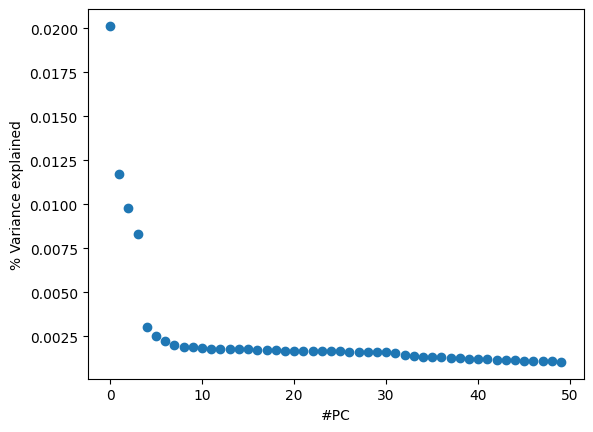

In [18]:
explained_variance = adata.uns["pca"].get("variance_ratio")
x = np.arange(len(explained_variance)) if explained_variance is not None else []

plt.plot(x, explained_variance, marker="o", linestyle="")
plt.gca().set(ylabel="% Variance explained", xlabel="#PC")

### Vizualization settings
Checkout some visualization information that is also stored in adata.uns

In [19]:
adata.uns["louvain_colors"]

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2', '#bcbd22'], dtype='<U7')

### Analysis parameters
Checkout some parameters for a specific step of the analysis that were also stored in adata.uns

In [20]:
adata.uns["louvain"]

{'params': {'random_state': array([0]), 'resolution': array([1])}}

## adata.obsm/adata.varm

Adata.obsm/varm are again mappings, that can store an arbitrary number of layers with the same length as the corresponding n_obs, n_var

These attribute store **embeddings**

In [21]:
adata.obsm

AxisArrays with keys: X_pca, X_tsne, X_umap, X_draw_graph_fr

In [22]:
assert len(adata.obsm["X_pca"]) == adata.n_obs 

print(adata.obsm["X_pca"].shape[1])

50


Just for fun, let's plot the first two principal components, by accessing the X_pca attribute (not recommended, see tutorial 2)

[[], [], Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

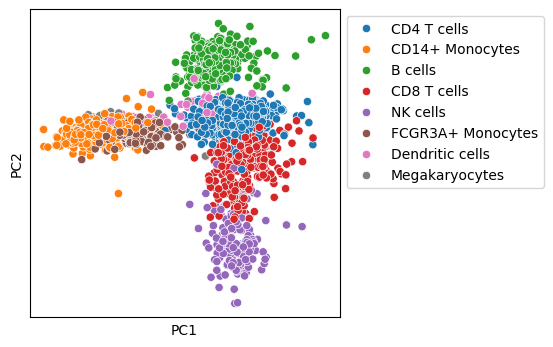

In [23]:
x = adata.obsm["X_pca"][:, 0]
y = adata.obsm["X_pca"][:, 1]

# Get categorical values from adata.obs 
c = adata.obs["louvain"]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(x=x, y=y, hue=c, ax=ax)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.gca().set(xticks=[], yticks=[], xlabel="PC1", ylabel="PC2")


In [24]:
import session_info
session_info.show(excludes=['distributed'])

/Users/lucas-diedrich/anaconda3/envs/spatialdata/lib/python3.11/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)
